# AIM
Apply hadamard transform on the given image and use it for image compression.  
  
B030  
Preet Jha  
B1  
Date: 18th AUG 2022  
Lab 4  

In [139]:
from scipy.linalg import hadamard
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from numpy import dtype


In [140]:
N = 4
H = hadamard(N)
print(H)
img = np.random.randint(20, size=(N,N))

[[ 1  1  1  1]
 [ 1 -1  1 -1]
 [ 1  1 -1 -1]
 [ 1 -1 -1  1]]


In [141]:
Af= np.dot(H,img)
F = np.dot(Af,np.transpose(H))

print(F)

[[156  34 -22  12]
 [ -6 -24   0 -46]
 [-28  42  14   0]
 [ 26  40 -12  22]]


In [142]:
ATF = np.dot(np.transpose(H),F)
F_inverse= np.dot(ATF, H)
F_inverse = F_inverse//(N*N)
print(img)
print('\n')
print(F)
print('\n')
print(F_inverse)

[[13  3 17  4]
 [13  1  8  5]
 [ 0 16 10 12]
 [19  2 15 18]]


[[156  34 -22  12]
 [ -6 -24   0 -46]
 [-28  42  14   0]
 [ 26  40 -12  22]]


[[13  3 17  4]
 [13  1  8  5]
 [ 0 16 10 12]
 [19  2 15 18]]


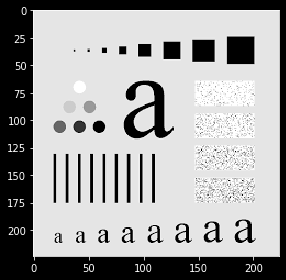

In [143]:
img1= io.imread('test.png')
io.imshow(img1)

In [144]:
def hada_transform(f,N):
    H=hadamard(N)
    F=np.dot(np.dot(H,f),np.transpose(H))
    F[N-6:N, N-6:N] = 0
    return(F)

def hada_inv_transform(F,N):
    H=hadamard(N)
    f=np.dot(np.dot(np.transpose(H),F),H)
    f = f//(N*N)
    return (f)

In [145]:
[row,col]=img1.shape
N=8
img1_hada=np.zeros((row,col),dtype=int)

In [146]:
for r in range(row//N):
    for c in range(col//N):
        temp=img1[r*N:(r+1)*N,c*N:(c+1)*N]
        img1_hada[r*N:(r+1)*N,c*N:(c+1)*N]=hada_transform(temp,N)

In [147]:
img1_inv = np.zeros((row, col))
for r in range(row//N):
    for c in range(col//N):
        temp = img1_hada[r*N:(r+1)*N, c*N:(c+1)*N]
        img1_inv[r*N:(r+1)*N, c*N:(c+1)*N] = hada_inv_transform(temp, N)


Text(0.5, 1.0, 'Inverse')

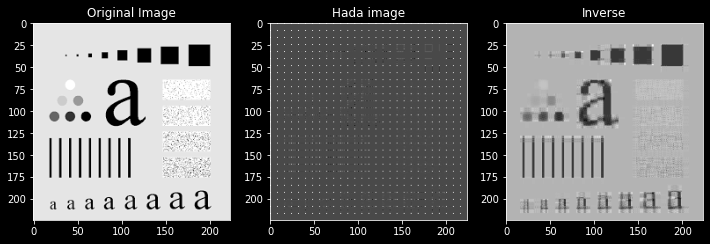

In [148]:
plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(img1, cmap="gray")
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(img1_hada, cmap="gray")
plt.title("Hada image")

plt.subplot(1, 3, 3)
plt.imshow(img1_inv, cmap="gray")
plt.title("Inverse")


# Conclusion
- Hadamard transform is applied on the given image. 
- If inverse of Hadamard transform is applied for the transformed image we get original image.
- To compress the given image, last 4 rows and cols of hadamard transform of 8x8 sub-image are converted to 0.
- It shows that the inverse transformation of the image is distorted. 
- Instead of this, if last 2 rows and 2 cols are converted to 0, the image and inverse transform image are similar.
- To achieve more compression,last 6 rows and 6 cols were converted to 0. The compressed image is completely distorted and is beyond acceptable range.